In [26]:
import tweepy
from collections import Counter
from konlpy.tag import Twitter
from konlpy.tag import Kkma
import pytagcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re
from matplotlib import font_manager, rc #한글 깨짐 현상

import numpy as np
import pandas as pd
import collections

## 5.1

In [113]:
api_key = "ylylXf2ehm9dz3b3m9oIzrE4q"
api_secret = "9YSr1xGBhaVj99XUcHkHZ47xnqi4n5tIMkhCIUQom32urHbQAH"

In [114]:
auth = tweepy.OAuthHandler(api_key, api_secret)

access_token = "1171579869047607296-JT7dgVK9ORIzkPA5Mx0uPy87AC1106"
access_token_secret = "RFT9IzxyBZrO2ghj1VE2AhP8NOLUGMjnVIm6Opim0UvWk"

In [115]:
auth.set_access_token(access_token, access_token_secret)

In [116]:
api = tweepy.API(auth)

In [117]:
keyword = "starbucks";     # 자신이 검색하고 싶은 유저
search = [] # 크롤링 결과 저장할 변수   

In [118]:
cnt = 1
while(cnt <= 10):   # 10page 대상으로 크롤링
   tweets = api.search(keyword)
   for tweet in tweets:
       search.append(tweet)
   cnt += 1

In [119]:
print(len(search)) # 문서 길이 

150


In [120]:
#전체 문서 보기

data = {}   # 전체 문서 추가
i = 0       # 문서 번호
for tweet in search:
    data['text'] = tweet.text   # text키에 text문서 저장
    print(i, " : ", data)   # 문서번호 : 문서내용
    i += 1

0  :  {'text': 'スタバのある生活♡\n\nSTARBUCKS♡LOVE https://t.co/BTYMhGmblX'}
1  :  {'text': 'RT @ifernweh: แจกกกก !!!\nAirpods 2 เครื่อง \nบัตร Starbucks 500 บาท 3 ใบ\nปลอบใจคนโดนหวยกิน\n\nกติกา 🥕\nRT + Reply อะไรก็ได้เกี่ยวกับแครอท\nพร้อม…'}
2  :  {'text': 'RT @DeepStateExpose: RT: 4th Reich "Democratic" Socialist meltdown at Starbucks!!!\nhttps://t.co/DtFiRcnQDm'}
3  :  {'text': 'RT @Starbucks_J: 春色で彩られた “さくらフード”は、ふんわりと優しい桜の味わいがお口の中に広がります。味覚で感じる春を楽しんでみませんか😊🌸\nhttps://t.co/E6M9mPXjUT https://t.co/fjVvOXwK9v'}
4  :  {'text': 'RT @ifernweh: แจกกกก !!!\nAirpods 2 เครื่อง \nบัตร Starbucks 500 บาท 3 ใบ\nปลอบใจคนโดนหวยกิน\n\nกติกา 🥕\nRT + Reply อะไรก็ได้เกี่ยวกับแครอท\nพร้อม…'}
5  :  {'text': "The Starbucks I'm in is playing some classic jazz and I automatically thought of our Taehyungie 💜💜 @BTS_twt"}
6  :  {'text': 'RT @ifernweh: แจกกกก !!!\nAirpods 2 เครื่อง \nบัตร Starbucks 500 บาท 3 ใบ\nปลอบใจคนโดนหวยกิน\n\nกติกา 🥕\nRT + Reply อะไรก็ได้เกี่ยวกับแครอท\nพร้อม…'}
7  :  {'text': 'RT @AikIsTweeting

In [121]:
# 전체 문서를 파일 저장

import os
    
wfile = open(os.getcwd()+"/starbucks.txt", mode='w', encoding="utf-8")   # 쓰기 모드
data = {}   # 전체 문서 추가
i = 0       # 문서 번호

In [122]:
for tweet in search:
    data['text'] = tweet.text   # text키에 text문서 저장
    wfile.write(data['text']+'\n')  # 파일 출력
    i += 1

wfile.close()

In [123]:
file = open(os.getcwd()+ '/positive-words.txt', mode='r', encoding='utf-8')

In [124]:
poswords = file.readlines()

In [125]:
sentence = []

for line in poswords:
    sentence.append(line)
file.close()

In [126]:
poswords = sentence

In [127]:
new = []

for pos in poswords:
    pos = re.sub("\n", "", pos)
    pos = re.sub(";", "", pos)
    new.append(pos)

In [128]:
pos_words = []
for i in range(len(new)):
    if len(new[i]) > 1:
        pos_words.append(new[i])

In [129]:
file = open(os.getcwd()+ '/negative-words.txt', mode='r', encoding='utf-8')

In [130]:
negwords = file.readlines()

In [131]:
sentence = []

for line in negwords:
    sentence.append(line)
file.close()

In [132]:
negwords = sentence

In [133]:
new = []

for neg in negwords:
    neg = re.sub("\n", "", neg)
    neg = re.sub(";", "", neg)
    new.append(neg)

In [134]:
neg_words = []
for i in range(len(new)):
    if len(new[i]) > 1:
        neg_words.append(new[i])

In [135]:
file = open(os.getcwd() + '/starbucks.txt', mode='r', encoding='utf-8')

In [136]:
star = file.readlines()

In [137]:
sentence = []

for line in star:
    sentence.append(line)
file.close()

In [138]:
star = sentence

In [139]:
new = []

for st in star:
    st = re.sub("\n", "", st)
    st = re.sub(";", "", st)
    st = re.sub("\ufeff", "", st)
    new.append(st)

In [140]:
star2 = []

for s in range(len(star)):
    star2.append([star[s]])

In [141]:
def sentiment(pos_words, neg_words, text):
    for i in range(len(text)):
        text[i][0] = re.sub('[^a-zA-Z]', ' ', text[i][0])
        text[i][0] = text[i][0].lower()
    
    nlp = Twitter()
    tagged = []

    for s in text:
        n = nlp.pos(s[0])
        tagged.append(n)
        
    total = []

    for t in range(len(tagged)):
        tag = []
        for i in range(len(tagged[t])):
            tag.append(tagged[t][i][0])
        total.append(tag)
        
    result = {}
    
    for t in range(len(total)):
        score = 0
        for i in range(len(total[t])):
            if total[t][i] in pos_words:
                score += 1
            if total[t][i] in neg_words:
                score -= 1
        result.update({text[t][0] : score})
        
    return result

In [142]:
result = sentiment(pos_words, neg_words, star2)

In [143]:
result

{'          ': 0,
 ' ': 0,
 'starbucks love https   t co btymhgmblx ': 1,
 'rt  ifernweh             ': 0,
 'airpods            ': 0,
 '     starbucks              ': 0,
 '                  ': 0,
 '        ': 0,
 'rt   reply                         ': 0,
 '       ': 0,
 'rt  deepstateexpose  rt   th reich  democratic  socialist meltdown at starbucks    ': -1,
 'https   t co dtfircnqdm ': 0,
 'rt  starbucks j                                                                 ': 0,
 'https   t co e m mpxjut https   t co fjvvoxwk v ': 0,
 'the starbucks i m in is playing some classic jazz and i automatically thought of our taehyungie     bts twt ': 1,
 'rt  aikistweeting  new starbucks   centralplaza ladprao                              bts        nitro on tap                                 ': 0,
 'rt   hepe                                   starbucks            https   t co wecq j g q ': 0,
 'rt  kevinli           johnsweeneyroar answer me this  why i should i pay for a service i do not wa

In [144]:
counter = collections.Counter(list(result.values()))

In [145]:
sorted(counter)

[-1, 0, 1]

In [146]:
np.mean(list(result.values()))

0.10526315789473684

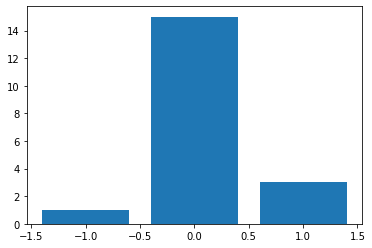

In [147]:
plt.bar(*zip(*counter.items()))
plt.show()

## 5.2

### 탬파베이 레이스(Tampa Bay Rays)

In [148]:
keyword = "#rays";     # 자신이 검색하고 싶은 유저
search = [] # 크롤링 결과 저장할 변수   

In [149]:
cnt = 1
while(cnt <= 10):   # 10page 대상으로 크롤링
   tweets = api.search(keyword)
   for tweet in tweets:
       search.append(tweet)
   cnt += 1

In [150]:
print(len(search)) # 문서 길이 

150


In [151]:
#전체 문서 보기

data = {}   # 전체 문서 추가
i = 0       # 문서 번호
for tweet in search:
    data['text'] = tweet.text   # text키에 text문서 저장
    print(i, " : ", data)   # 문서번호 : 문서내용
    i += 1

0  :  {'text': 'マイクを握りしめ\u3000このstageに立って\n届けたい\u3000響けよ\u3000our music\u3000\n忘れちゃいないから\u3000初めて歌ったとき\n必ず辿り着くと決めてた\n\nRAYS/music life\n #RAYS'}
1  :  {'text': 'RT @ENOi_Member_twt: [#라온 &amp; #진우]\n\n⛄️눈사람 만들고싶다 ☃️\n\n🌟같이 눈사람 만들 RAYS❓✋\n\n#이엔오아이 #ENOi #Laon #Jinwoo #RAYS https://t.co/VPzQzMWTKq'}
2  :  {'text': 'RT @ENOi_Member_twt: [#라온 &amp; #진우]\n\n⛄️눈사람 만들고싶다 ☃️\n\n🌟같이 눈사람 만들 RAYS❓✋\n\n#이엔오아이 #ENOi #Laon #Jinwoo #RAYS https://t.co/VPzQzMWTKq'}
3  :  {'text': 'RT @ENOi_Member_twt: [#라온 &amp; #진우]\n\n⛄️눈사람 만들고싶다 ☃️\n\n🌟같이 눈사람 만들 RAYS❓✋\n\n#이엔오아이 #ENOi #Laon #Jinwoo #RAYS https://t.co/VPzQzMWTKq'}
4  :  {'text': 'RT @ENOi_Member_twt: [#라온 &amp; #진우]\n\n⛄️눈사람 만들고싶다 ☃️\n\n🌟같이 눈사람 만들 RAYS❓✋\n\n#이엔오아이 #ENOi #Laon #Jinwoo #RAYS https://t.co/VPzQzMWTKq'}
5  :  {'text': 'RT @ENOi_Member_twt: [#라온 &amp; #진우]\n\n⛄️눈사람 만들고싶다 ☃️\n\n🌟같이 눈사람 만들 RAYS❓✋\n\n#이엔오아이 #ENOi #Laon #Jinwoo #RAYS https://t.co/VPzQzMWTKq'}
6  :  {'text': 'RT @ENOi_Member_twt: [#라온 &amp; #진우]\n\n⛄️눈사람 만들고싶다 ☃️\n\n🌟같이 눈사람 만들 

In [152]:
# 전체 문서를 파일 저장

import os
    
wfile = open(os.getcwd()+"/rays.txt", mode='w', encoding="utf-8")   # 쓰기 모드
data = {}   # 전체 문서 추가
i = 0       # 문서 번호

In [153]:
for tweet in search:
    data['text'] = tweet.text   # text키에 text문서 저장
    wfile.write(data['text']+'\n')  # 파일 출력
    i += 1

wfile.close()

###  보스턴 레드삭스(Boston Red Sox)

In [154]:
keyword = "#redsox";     # 자신이 검색하고 싶은 유저
search = [] # 크롤링 결과 저장할 변수   

In [155]:
cnt = 1
while(cnt <= 10):   # 10page 대상으로 크롤링
   tweets = api.search(keyword)
   for tweet in tweets:
       search.append(tweet)
   cnt += 1

In [156]:
print(len(search)) # 문서 길이 

150


In [157]:
#전체 문서 보기

data = {}   # 전체 문서 추가
i = 0       # 문서 번호
for tweet in search:
    data['text'] = tweet.text   # text키에 text문서 저장
    print(i, " : ", data)   # 문서번호 : 문서내용
    i += 1

0  :  {'text': 'RT @heelsonthefield: @teamboston Anyone commenting here is welcome to read the story I wrote, which relies on details in the official polic…'}
1  :  {'text': "@SackMikesack100 @VincentOrleck @RedSox Michael has good living, I'm sure he's great at it, he will be happy to acc… https://t.co/7d3LO2t2rH"}
2  :  {'text': '@NickSchafer @jaredfootball9 @Jomboy_ Even as a lifelong #RedSox fan, I can say that the Yankees got robbed.\nIf… https://t.co/apPykVvecB'}
3  :  {'text': '@kramski60 @StephFromNH @RedSox Boating season. I wish I were avid #RedSox game attender so I could boycott them this season. 🖕 #mlb'}
4  :  {'text': '@mghsport @jbbrisco @ByNateTaylor @RealMNchiefsfan Are they playing the #Astros or #RedSox or any other team? I fee… https://t.co/x7vYCQy6Mk'}
5  :  {'text': 'RT @RedSox: The #RedSox today signed outfielder Kevin Pillar to a one-year contract for the 2020 season. https://t.co/ZdwaoGTORb'}
6  :  {'text': 'RT @215PHLSports: USA Today Sports 2020 MLB Predictio

In [158]:
# 전체 문서를 파일 저장

import os
    
wfile = open(os.getcwd()+"/redsox.txt", mode='w', encoding="utf-8")   # 쓰기 모드
data = {}   # 전체 문서 추가
i = 0       # 문서 번호

In [159]:
for tweet in search:
    data['text'] = tweet.text   # text키에 text문서 저장
    wfile.write(data['text']+'\n')  # 파일 출력
    i += 1

wfile.close()

### 뉴욕 양키스(New York Yankees)

In [160]:
keyword = "#yankees";     # 자신이 검색하고 싶은 유저
search = [] # 크롤링 결과 저장할 변수   

In [161]:
cnt = 1
while(cnt <= 10):   # 10page 대상으로 크롤링
   tweets = api.search(keyword)
   for tweet in tweets:
       search.append(tweet)
   cnt += 1

In [162]:
print(len(search)) # 문서 길이 

150


In [163]:
#전체 문서 보기

data = {}   # 전체 문서 추가
i = 0       # 문서 번호
for tweet in search:
    data['text'] = tweet.text   # text키에 text문서 저장
    print(i, " : ", data)   # 문서번호 : 문서내용
    i += 1

0  :  {'text': 'RT @PCreighton1: The #Yankees scored 1, 1, 1, &amp; 0 runs in 4 games vs #Astros at MMP. \n\nDo tell me how NYY got cheated in those 4 games.  Th…'}
1  :  {'text': 'That time we played some clips of the cringe-worthy "apologies" from the #Astros organization &amp; the #Yankees respon… https://t.co/FRqdCaMUGM'}
2  :  {'text': 'RT @0Diannmal: #nyyankees #Yankees #bronx #chrischamblass #mld #BronxBombers #bronxnation #YankeeStadium #baseball #AutographedBaseball #Au…'}
3  :  {'text': 'RT @Rangerita: Guys. Yankee question! In this pic, there are 2 guys. Babe Ruth and...? \n#yankees #baberuth https://t.co/qlP6w0sxV9'}
4  :  {'text': '@Kristen_MarieNY The #Yankees 2020 #MLB season ⚾ from Tampa, FL,  #SpringTraining ~ to #YankeeStadium in the Bronx… https://t.co/AYfQl4ucOy'}
5  :  {'text': '@YESNetwork From the player who said this: #Yankees #PinstripePride https://t.co/we87QHMzIT'}
6  :  {'text': 'RT @yanksopeningday: Number 39, Mike Tauchman helps remind us that we’re 39 day

In [164]:
# 전체 문서를 파일 저장

import os
    
wfile = open(os.getcwd()+"/yankees.txt", mode='w', encoding="utf-8")   # 쓰기 모드
data = {}   # 전체 문서 추가
i = 0       # 문서 번호

In [165]:
for tweet in search:
    data['text'] = tweet.text   # text키에 text문서 저장
    wfile.write(data['text']+'\n')  # 파일 출력
    i += 1

wfile.close()

### 볼티모어 오리올스(Baltimore Orioles)

In [166]:
keyword = "#orioles";     # 자신이 검색하고 싶은 유저
search = [] # 크롤링 결과 저장할 변수   

In [167]:
cnt = 1
while(cnt <= 10):   # 10page 대상으로 크롤링
   tweets = api.search(keyword)
   for tweet in tweets:
       search.append(tweet)
   cnt += 1

In [168]:
print(len(search)) # 문서 길이 

140


In [169]:
#전체 문서 보기

data = {}   # 전체 문서 추가
i = 0       # 문서 번호
for tweet in search:
    data['text'] = tweet.text   # text키에 text문서 저장
    print(i, " : ", data)   # 문서번호 : 문서내용
    i += 1

0  :  {'text': 'RT @215PHLSports: USA Today Sports 2020 MLB Predictions \n\n#Yankees 103-59\n#Rays 92-70\n#RedSox 84-78\n#BlueJays 75-87\n#Orioles 57-105\n#MNTwin…'}
1  :  {'text': '@Os_and_BOHs @Lestermartin9 @RichDubroffMLB #masnsports lawsuit v. #Nationals. Will Angelos family be able to withs… https://t.co/2mcmCysFKH'}
2  :  {'text': "RT @JoeTrezz: Here are Rob Manfred's full comments on the Angelos family and the #Orioles' future in Baltimore: https://t.co/WM5gio2M81"}
3  :  {'text': 'RT @JoeTrezz: Orioles EVP/GM Mike Elias was asked again today about the Astros scandal and the Houston connections he and several other cur…'}
4  :  {'text': 'RT @PuffyGatorArt: Throwback to little landscapes from brush experimentation\n\n#nightsky #galaxy #orioles #landscapeart https://t.co/QXcWXk5…'}
5  :  {'text': 'RT @NotBrandonHyde: Alright Orioles fans- like, retweet and follow me for a chance to win this signed Jonathan Schoop baseball, acquired by…'}
6  :  {'text': 'RT @masnRoch: Rob Manfred 

In [170]:
# 전체 문서를 파일 저장

import os
    
wfile = open(os.getcwd()+"/orioles.txt", mode='w', encoding="utf-8")   # 쓰기 모드
data = {}   # 전체 문서 추가
i = 0       # 문서 번호

In [171]:
for tweet in search:
    data['text'] = tweet.text   # text키에 text문서 저장
    wfile.write(data['text']+'\n')  # 파일 출력
    i += 1

wfile.close()

### 토론토 블루제이스(Toronto Blue Jays)

In [176]:
keyword = "#bluejays";     # 자신이 검색하고 싶은 유저
search = [] # 크롤링 결과 저장할 변수   

In [177]:
cnt = 1
while(cnt <= 10):   # 10page 대상으로 크롤링
   tweets = api.search(keyword)
   for tweet in tweets:
       search.append(tweet)
   cnt += 1

In [178]:
print(len(search)) # 문서 길이 

150


In [179]:
#전체 문서 보기

data = {}   # 전체 문서 추가
i = 0       # 문서 번호
for tweet in search:
    data['text'] = tweet.text   # text키에 text문서 저장
    print(i, " : ", data)   # 문서번호 : 문서내용
    i += 1

0  :  {'text': "RT @bnicholsonsmith: RIP Tony Fernandez, #BlueJays' all-time leader in hits &amp; games played. Four-time Gold Glove winner was a fixture on To…"}
1  :  {'text': 'RT @thehazelmae: #BlueJays Future Player Development Complex: \n\nThis is the 3500 sq. ft major league clubhouse with space for 72 lockers. h…'}
2  :  {'text': 'Sad to hear the passing of Tony Fernandez.  Hands down an icon in Blue Jays history. #RIPTonyFernandez #BlueJays'}
3  :  {'text': 'RT @BluejaysAlways: Tony Fernandez All-Time #BlueJays rankings:\n\n37.5 WAR (1st)\n12.4 Defensive WAR (1st) \n1,583 Hits (1st)\n1,450 Games (1st…'}
4  :  {'text': 'RT @thehazelmae: Former #BlueJays manager Buck Martinez called Tony Fernandez a “good man” and a “special player” who could “cut down teamm…'}
5  :  {'text': 'RT @harry_fosters: The last Blue Jay was going straight up to the feeder from the ground, this one is dropping straight down from a perch.…'}
6  :  {'text': 'RT @harry_fosters: The last Blue Jay was going s

In [180]:
# 전체 문서를 파일 저장

import os
    
wfile = open(os.getcwd()+"/bluejays.txt", mode='w', encoding="utf-8")   # 쓰기 모드
data = {}   # 전체 문서 추가
i = 0       # 문서 번호

In [181]:
for tweet in search:
    data['text'] = tweet.text   # text키에 text문서 저장
    wfile.write(data['text']+'\n')  # 파일 출력
    i += 1

wfile.close()

### 감성분석

In [398]:
file = open(os.getcwd()+ '/positive_word.txt', mode='r', encoding='utf-8') #한글

In [399]:
poswords = file.readlines()

In [400]:
sentence = []

for line in poswords:
    sentence.append(line)
file.close()

In [401]:
poswords = sentence

In [402]:
new = []

for pos in poswords:
    pos = re.sub("\n", "", pos)
    pos = re.sub(";", "", pos)
    new.append(pos)

In [403]:
pos_words = []
for i in range(len(new)):
    if len(new[i]) > 1:
        pos_words.append(new[i])

In [404]:
file = open(os.getcwd()+ '/negative_word.txt', mode='r', encoding='utf-8') #한글

In [405]:
negwords = file.readlines()

In [406]:
sentence = []

for line in negwords:
    sentence.append(line)
file.close()

In [407]:
negwords = sentence

In [408]:
new = []

for neg in negwords:
    neg = re.sub("\n", "", neg)
    neg = re.sub(";", "", neg)
    new.append(neg)

In [409]:
neg_words = []
for i in range(len(new)):
    if len(new[i]) > 1:
        neg_words.append(new[i])

In [410]:
file = open(os.getcwd() + '/rays.txt', mode='r', encoding='utf-8')

In [411]:
rays = file.readlines()

In [412]:
sentence = []

for line in rays:
    sentence.append(line)
file.close()

In [413]:
rays = sentence

In [414]:
new = []

for i in rays:
    i = re.sub("\n", "", i)
    i = re.sub(";", "", i)
    i = re.sub("\ufeff", "", i)
    new.append(i)

In [415]:
rays2 = []

for s in range(len(rays)):
    rays2.append([rays[s]])

In [416]:
def sentiment(pos_words, neg_words, text):
    for i in range(len(text)):
        text[i][0] = re.sub('[ㄱ-ㅎ]', ' ', text[i][0])
        text[i][0] = text[i][0].lower()
    
    nlp = Twitter()
    tagged = []

    for s in text:
        n = nlp.pos(s[0])
        tagged.append(n)
        
    total = []

    for t in range(len(tagged)):
        tag = []
        for i in range(len(tagged[t])):
            tag.append(tagged[t][i][0])
        total.append(tag)
        
    result = {}
    
    for t in range(len(total)):
        score = 0
        for i in range(len(total[t])):
            if total[t][i] in pos_words:
                score += 1
            if total[t][i] in neg_words:
                score -= 1
        result.update({text[t][0] : score})
        
    return result

In [417]:
rays_result = sentiment(pos_words, neg_words, rays2)

In [418]:
rays_result

{'マイクを握りしめ\u3000このstageに立って\n': 0,
 '届けたい\u3000響けよ\u3000our music\u3000\n': 0,
 '忘れちゃいないから\u3000初めて歌ったとき\n': 0,
 '必ず辿り着くと決めてた\n': 0,
 '\n': 0,
 'rays/music life\n': 0,
 ' #rays\n': 0,
 'rt @enoi_member_twt: [#라온 &amp; #진우]\n': 0,
 '⛄️눈사람 만들고싶다 ☃️\n': 0,
 '🌟같이 눈사람 만들 rays❓✋\n': 0,
 '#이엔오아이 #enoi #laon #jinwoo #rays https://t.co/vpzqzmwtkq\n': 0,
 'rt @enoi_member_twt: [#건]\n': 0,
 '고생 진짜 많아떠요 rays❤️ 싸랑해행\n': 0,
 '#이엔오아이 #enoi #gun #rays #발칙하게_enoi https://t.co/dsdbov9hzo\n': 0,
 'rt @enoi_member_twt: [#이엔오아이]\n': 0,
 'rays🌟 저녁 먹었어요-?\n': 0,
 '보고싶어요 벌써 🥺\n': 0,
 '우리 빨리 만나요🥺🥺🥺 \n': 0,
 '#enoi #rays #발칙하게_enoi https://t.co/mxzopoyp0a\n': 0,
 '정말 열심히 준비한 enoi의 첫 번째 미니앨범이 발매되었습니다 :)\n': 0,
 '오랫동안 기다려주셔서 정말 감사합니다\n': 0,
 '발칙하게, 열심히 활동할게요 🍎\n': 1,
 '많은 사랑 부탁드립니다 ‼️\n': 1,
 '#enoi #rays…\n': 0,
 'rt @enoi_member_twt: [#제이키드]\n': 0,
 '발칙하게 안녕😭ㅜㅜ\n': 0,
 '레이즈들!!\n': 0,
 '마지막까지 응원해줘서 너무 고맙구\n': 0,
 '사랑햄요❤️\n': 1,
 '#이엔오아이 #enoi #jkid #rays #발칙하게_enoi https://t.co/v2cwfzzjza\n': 0}

In [419]:
rays_counter = collections.Counter(list(rays_result.values()))

In [420]:
sorted(rays_counter)

[0, 1]

In [421]:
np.mean(list(rays_result.values()))

0.1

In [275]:
file = open(os.getcwd()+ '/positive-words.txt', mode='r', encoding='utf-8') #영어

In [276]:
poswords = file.readlines()

In [277]:
sentence = []

for line in poswords:
    sentence.append(line)
file.close()

In [278]:
poswords = sentence

In [279]:
new = []

for pos in poswords:
    pos = re.sub("\n", "", pos)
    pos = re.sub(";", "", pos)
    new.append(pos)

In [280]:
pos_words = []
for i in range(len(new)):
    if len(new[i]) > 1:
        pos_words.append(new[i])

In [281]:
file = open(os.getcwd()+ '/negative-words.txt', mode='r', encoding='utf-8') #영어

In [282]:
negwords = file.readlines()

In [283]:
sentence = []

for line in negwords:
    sentence.append(line)
file.close()

In [284]:
negwords = sentence

In [285]:
new = []

for neg in negwords:
    neg = re.sub("\n", "", neg)
    neg = re.sub(";", "", neg)
    new.append(neg)

In [286]:
neg_words = []
for i in range(len(new)):
    if len(new[i]) > 1:
        neg_words.append(new[i])

In [287]:
file = open(os.getcwd() + '/redsox.txt', mode='r', encoding='utf-8')

redsox = file.readlines()

sentence = []

for line in redsox:
    sentence.append(line)
file.close()

In [288]:
redsox = sentence

In [289]:
new = []

for i in redsox:
    i = re.sub("\n", "", i)
    i = re.sub(";", "", i)
    i = re.sub("\ufeff", "", i)
    new.append(i)

In [290]:
redsox2 = []

for s in range(len(redsox)):
    redsox2.append([redsox[s]])

In [291]:
def sentiment(pos_words, neg_words, text):
    for i in range(len(text)):
        text[i][0] = re.sub('[^a-zA-Z]', ' ', text[i][0])
        text[i][0] = text[i][0].lower()
    
    nlp = Twitter()
    tagged = []

    for s in text:
        n = nlp.pos(s[0])
        tagged.append(n)
        
    total = []

    for t in range(len(tagged)):
        tag = []
        for i in range(len(tagged[t])):
            tag.append(tagged[t][i][0])
        total.append(tag)
        
    result = {}
    
    for t in range(len(total)):
        score = 0
        for i in range(len(total[t])):
            if total[t][i] in pos_words:
                score += 1
            if total[t][i] in neg_words:
                score -= 1
        result.update({text[t][0] : score})
        
    return result

In [293]:
redsox_result = sentiment(pos_words, neg_words, redsox2)

In [294]:
redsox_result

{'rt  heelsonthefield   teamboston anyone commenting here is welcome to read the story i wrote  which relies on details in the official polic  ': 1,
 ' sackmikesack     vincentorleck  redsox michael has good living  i m sure he s great at it  he will be happy to acc  https   t co  d lo t rh ': 3,
 ' nickschafer  jaredfootball   jomboy  even as a lifelong  redsox fan  i can say that the yankees got robbed  ': 0,
 'if  https   t co appykvvecb ': 0,
 ' kramski    stephfromnh  redsox boating season  i wish i were avid  redsox game attender so i could boycott them this season     mlb ': 0,
 ' mghsport  jbbrisco  bynatetaylor  realmnchiefsfan are they playing the  astros or  redsox or any other team  i fee  https   t co x vycqy mk ': 0,
 'rt  redsox  the  redsox today signed outfielder kevin pillar to a one year contract for the      season  https   t co zdwaogtorb ': 0,
 'rt     phlsports  usa today sports      mlb predictions  ': 0,
 ' ': 0,
 ' yankees        ': 0,
 ' rays       ': 0,
 ' r

In [301]:
redsox_counter = collections.Counter(list(redsox_result.values()))

In [302]:
redsox_counter

Counter({1: 4, 3: 1, 0: 15, -2: 1, 2: 1, -1: 1})

In [307]:
np.mean(list(redsox_result.values()))

0.2608695652173913

In [308]:
from matplotlib import font_manager, rc #한글 깨짐 현상
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/H2PORM.ttf").get_name()
rc('font', family=font_name)

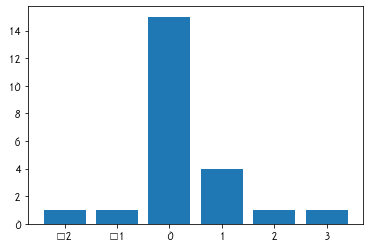

In [310]:
plt.bar(*zip(*redsox_counter.items()))
plt.show()

In [311]:
file = open(os.getcwd() + '/yankees.txt', mode='r', encoding='utf-8')

yankees = file.readlines()

sentence = []

for line in yankees:
    sentence.append(line)
file.close()

In [312]:
yankees = sentence

In [313]:
new = []

for i in yankees:
    i = re.sub("\n", "", i)
    i = re.sub(";", "", i)
    i = re.sub("\ufeff", "", i)
    new.append(i)

In [314]:
yankees2 = []

for s in range(len(yankees)):
    yankees2.append([yankees[s]])

In [315]:
def sentiment(pos_words, neg_words, text):
    for i in range(len(text)):
        text[i][0] = re.sub('[^a-zA-Z]', ' ', text[i][0])
        text[i][0] = text[i][0].lower()
    
    nlp = Twitter()
    tagged = []

    for s in text:
        n = nlp.pos(s[0])
        tagged.append(n)
        
    total = []

    for t in range(len(tagged)):
        tag = []
        for i in range(len(tagged[t])):
            tag.append(tagged[t][i][0])
        total.append(tag)
        
    result = {}
    
    for t in range(len(total)):
        score = 0
        for i in range(len(total[t])):
            if total[t][i] in pos_words:
                score += 1
            if total[t][i] in neg_words:
                score -= 1
        result.update({text[t][0] : score})
        
    return result

In [316]:
yankees_result = sentiment(pos_words, neg_words, yankees2)

In [317]:
yankees_result

{'rt  pcreighton   the  yankees scored           amp    runs in   games vs  astros at mmp   ': 0,
 ' ': 0,
 'do tell me how nyy got cheated in those   games   th  ': -1,
 'that time we played some clips of the cringe worthy  apologies  from the  astros organization  amp  the  yankees respon  https   t co frqdcamugm ': 0,
 'rt   diannmal   nyyankees  yankees  bronx  chrischamblass  mld  bronxbombers  bronxnation  yankeestadium  baseball  autographedbaseball  au  ': 0,
 'rt  rangerita  guys  yankee question  in this pic  there are   guys  babe ruth and      ': 0,
 ' yankees  baberuth https   t co qlp w sxv  ': 0,
 ' kristen marieny the  yankees       mlb season   from tampa  fl    springtraining   to  yankeestadium in the bronx  https   t co ayfql ucoy ': 0,
 ' yesnetwork from the player who said this   yankees  pinstripepride https   t co we  qhmzit ': 0,
 'rt  yanksopeningday  number     mike tauchman helps remind us that we re    days away from yankees opening day  today s post is bro

In [318]:
yankees_counter = collections.Counter(list(yankees_result.values()))

In [319]:
yankees_counter

Counter({0: 16, -1: 1, 1: 2, -3: 1})

In [320]:
np.mean(list(yankees_result.values()))

-0.1

In [321]:
from matplotlib import font_manager, rc #한글 깨짐 현상
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/H2PORM.ttf").get_name()
rc('font', family=font_name)

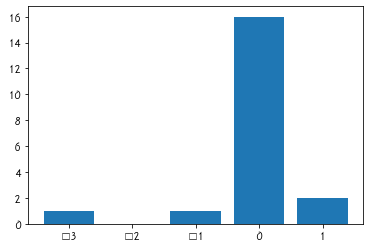

In [322]:
plt.bar(*zip(*yankees_counter.items()))
plt.show()

In [347]:
file = open(os.getcwd() + '/orioles.txt', mode='r', encoding='utf-8')

orioles = file.readlines()

sentence = []

for line in orioles:
    sentence.append(line)
file.close()

In [348]:
orioles = sentence

In [349]:
new = []

for i in orioles:
    i = re.sub("\n", "", i)
    i = re.sub(";", "", i)
    i = re.sub("\ufeff", "", i)
    new.append(i)

In [350]:
orioles2 = []

for s in range(len(orioles)):
    orioles2.append([orioles[s]])

In [351]:
def sentiment(pos_words, neg_words, text):
    for i in range(len(text)):
        text[i][0] = re.sub('[^a-zA-Z]', ' ', text[i][0])
        text[i][0] = text[i][0].lower()
    
    nlp = Twitter()
    tagged = []

    for s in text:
        n = nlp.pos(s[0])
        tagged.append(n)
        
    total = []

    for t in range(len(tagged)):
        tag = []
        for i in range(len(tagged[t])):
            tag.append(tagged[t][i][0])
        total.append(tag)
        
    result = {}
    
    for t in range(len(total)):
        score = 0
        for i in range(len(total[t])):
            if total[t][i] in pos_words:
                score += 1
            if total[t][i] in neg_words:
                score -= 1
        result.update({text[t][0] : score})
        
    return result

In [352]:
orioles_result = sentiment(pos_words, neg_words, orioles2)

In [353]:
orioles_result

{'rt     phlsports  usa today sports      mlb predictions  ': 0,
 ' ': 0,
 ' yankees        ': 0,
 ' rays       ': 0,
 ' redsox       ': 0,
 ' bluejays       ': 0,
 ' orioles        ': 0,
 ' mntwin  ': 0,
 ' os and bohs  lestermartin   richdubroffmlb  masnsports lawsuit v   nationals  will angelos family be able to withs  https   t co  mcmcysfkh ': 0,
 'rt  joetrezz  here are rob manfred s full comments on the angelos family and the  orioles  future in baltimore  https   t co wm gio m   ': 0,
 'rt  joetrezz  orioles evp gm mike elias was asked again today about the astros scandal and the houston connections he and several other cur  ': -1,
 'rt  puffygatorart  throwback to little landscapes from brush experimentation ': 0,
 ' nightsky  galaxy  orioles  landscapeart https   t co qxcwxk   ': 0,
 'rt  notbrandonhyde  alright orioles fans  like  retweet and follow me for a chance to win this signed jonathan schoop baseball  acquired by  ': 3,
 'rt  masnroch  rob manfred said he s spent a c

In [354]:
orioles_counter = collections.Counter(list(orioles_result.values()))

In [355]:
orioles_counter

Counter({0: 21, -1: 1, 3: 1, 1: 3, -2: 1})

In [356]:
np.mean(list(orioles_result.values()))

0.1111111111111111

In [357]:
from matplotlib import font_manager, rc #한글 깨짐 현상
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/H2PORM.ttf").get_name()
rc('font', family=font_name)

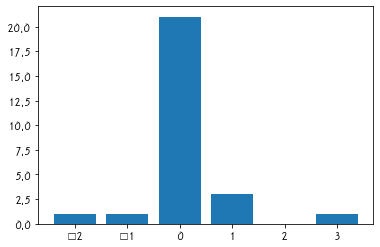

In [358]:
plt.bar(*zip(*orioles_counter.items()))
plt.show()

In [359]:
file = open(os.getcwd() + '/bluejays.txt', mode='r', encoding='utf-8')

bluejays = file.readlines()

sentence = []

for line in bluejays:
    sentence.append(line)
file.close()

In [360]:
bluejays = sentence

In [361]:
new = []

for i in bluejays:
    i = re.sub("\n", "", i)
    i = re.sub(";", "", i)
    i = re.sub("\ufeff", "", i)
    new.append(i)

In [362]:
bluejays2 = []

for s in range(len(bluejays)):
    bluejays2.append([bluejays[s]])

In [363]:
def sentiment(pos_words, neg_words, text):
    for i in range(len(text)):
        text[i][0] = re.sub('[^a-zA-Z]', ' ', text[i][0])
        text[i][0] = text[i][0].lower()
    
    nlp = Twitter()
    tagged = []

    for s in text:
        n = nlp.pos(s[0])
        tagged.append(n)
        
    total = []

    for t in range(len(tagged)):
        tag = []
        for i in range(len(tagged[t])):
            tag.append(tagged[t][i][0])
        total.append(tag)
        
    result = {}
    
    for t in range(len(total)):
        score = 0
        for i in range(len(total[t])):
            if total[t][i] in pos_words:
                score += 1
            if total[t][i] in neg_words:
                score -= 1
        result.update({text[t][0] : score})
        
    return result

In [364]:
bluejays_result = sentiment(pos_words, neg_words, bluejays2)

In [365]:
bluejays_result

{'rt  bnicholsonsmith  rip tony fernandez   bluejays  all time leader in hits  amp  games played  four time gold glove winner was a fixture on to  ': 1,
 'rt  thehazelmae   bluejays future player development complex   ': -1,
 ' ': 0,
 'this is the      sq  ft major league clubhouse with space for    lockers  h  ': 0,
 'sad to hear the passing of tony fernandez   hands down an icon in blue jays history   riptonyfernandez  bluejays ': -1,
 'rt  bluejaysalways  tony fernandez all time  bluejays rankings  ': 0,
 '     war   st  ': 0,
 '     defensive war   st   ': -1,
 '      hits   st  ': 0,
 '      games   st  ': 0,
 'rt  thehazelmae  former  bluejays manager buck martinez called tony fernandez a  good man  and a  special player  who could  cut down teamm  ': 1,
 'rt  harry fosters  the last blue jay was going straight up to the feeder from the ground  this one is dropping straight down from a perch   ': 0,
 'rt  purirv   qui n tiene ganas de que empiece el  b isbol    ': 0,
 ' mlb ': 0,

In [371]:
bluejays_counter = collections.Counter(list(bluejays_result.values()))

In [372]:
bluejays_counter

Counter({1: 2, -1: 3, 0: 12, -3: 1})

In [373]:
np.mean(list(bluejays_result.values()))

-0.2222222222222222

In [374]:
from matplotlib import font_manager, rc #한글 깨짐 현상
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/H2PORM.ttf").get_name()
rc('font', family=font_name)

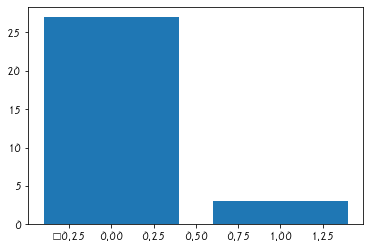

In [425]:
plt.bar(*zip(*rays_counter.items()))
plt.show()

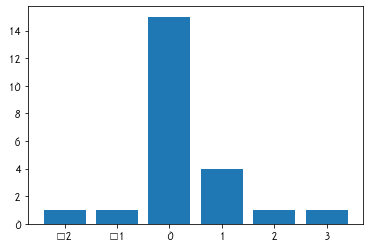

In [424]:
plt.bar(*zip(*redsox_counter.items()))
plt.show()

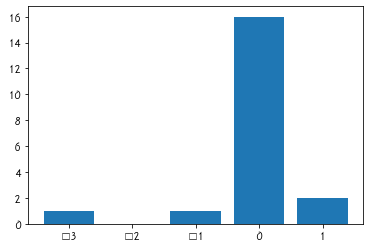

In [426]:
plt.bar(*zip(*yankees_counter.items()))
plt.show()

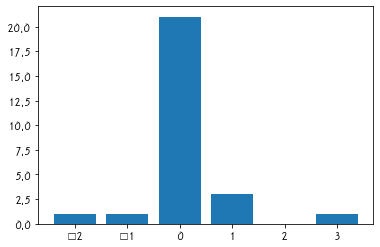

In [427]:
plt.bar(*zip(*orioles_counter.items()))
plt.show()

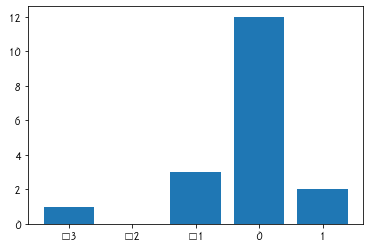

In [375]:
plt.bar(*zip(*bluejays_counter.items()))
plt.show()